Decision Tree (max_depth=3) mean TRAIN accuracy: 0.99
Decision Tree (max_depth=3) mean TEST accuracy : 0.90

Random Forest (max_depth=3) mean TRAIN accuracy: 1.00
Random Forest (max_depth=3) mean TEST accuracy : 0.98


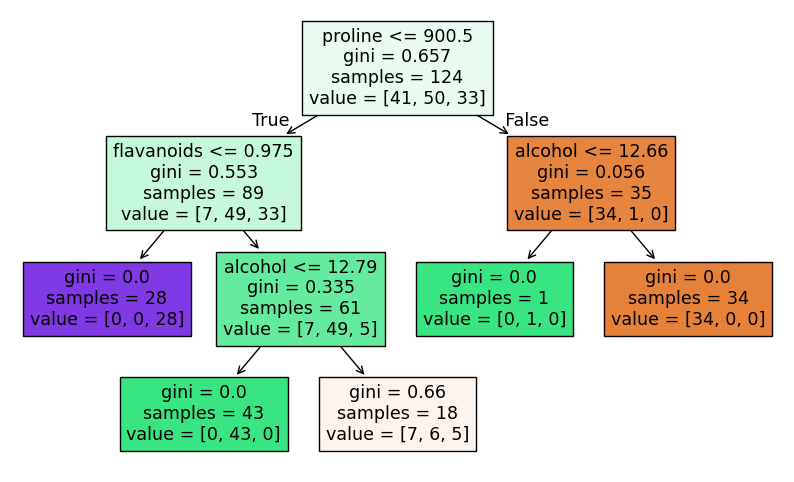

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset as a pandas DataFrame (features + target column)
df = load_wine(as_frame=True).frame

# Prepare input features (X) and target variable (y) for classification
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Repeated cross-validation with 30% test size (stratified to preserve class proportions)
cv = StratifiedShuffleSplit(n_splits=99, test_size=0.30, random_state=42)

dt_train_scores, dt_test_scores = [], []
rf_train_scores, rf_test_scores = [], []

dtc_model_last = None  # to keep the last trained tree for plotting

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # a) Decision Tree with max depth 3
    dtc_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    dtc_model.fit(X_train, y_train)

    y_pred_train = dtc_model.predict(X_train)
    y_pred_test = dtc_model.predict(X_test)

    dt_train_scores.append(accuracy_score(y_train, y_pred_train))
    dt_test_scores.append(accuracy_score(y_test, y_pred_test))

    dtc_model_last = dtc_model  # keep last model for plotting

    # b) Random Forest with max depth 3
    rfc_model = RandomForestClassifier(max_depth=3, random_state=42)
    rfc_model.fit(X_train, y_train)

    y_pred_train_rf = rfc_model.predict(X_train)
    y_pred_test_rf = rfc_model.predict(X_test)

    rf_train_scores.append(accuracy_score(y_train, y_pred_train_rf))
    rf_test_scores.append(accuracy_score(y_test, y_pred_test_rf))

# Report mean accuracies across repeats
print(f"Decision Tree (max_depth=3) mean TRAIN accuracy: {np.mean(dt_train_scores):.2f}")
print(f"Decision Tree (max_depth=3) mean TEST accuracy : {np.mean(dt_test_scores):.2f}\n")

print(f"Random Forest (max_depth=3) mean TRAIN accuracy: {np.mean(rf_train_scores):.2f}")
print(f"Random Forest (max_depth=3) mean TEST accuracy : {np.mean(rf_test_scores):.2f}")

# Plot the Decision Tree from the last repeat (you could also store/plot the first one)
plt.figure(figsize=(10, 6))
plot_tree(dtc_model_last, feature_names=X.columns, filled=True)
plt.show()